In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv files, functions, variables, etc
df_full = pd.read_csv('../data/art_labels.csv', index_col=0)
df = pd.read_csv('../data/train.csv', index_col=0)

In [3]:
image_path='../images'

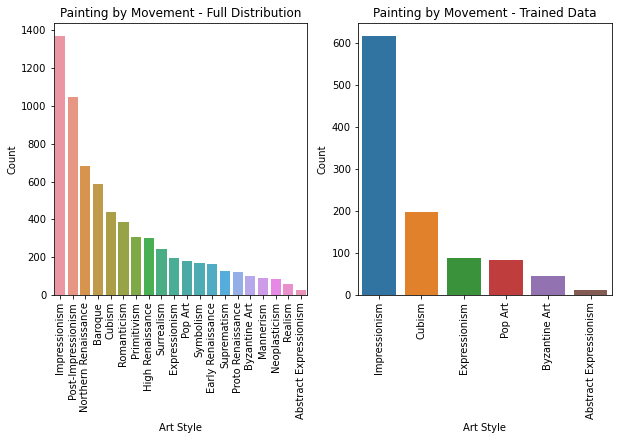

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=df_full.genre.value_counts().keys(), y=df_full.genre.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement - Full Distribution')

plt.subplot(1,2,2)
sns.barplot(x=df.label.value_counts().keys(), y=df.label.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement - Trained Data')
plt.savefig(f'../data/dist.jpg', bbox_inches='tight')

plt.show()

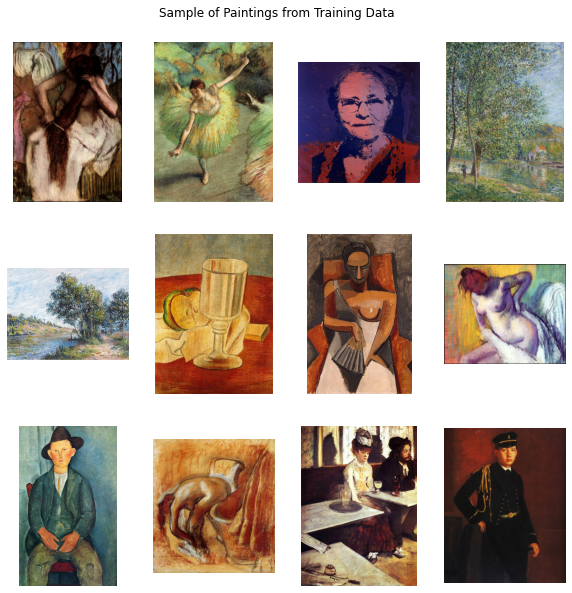

In [7]:
filepath = list(np.random.choice(df.filepath, 12, replace=False))

plt.figure(figsize=(10,10))

for i in range(len(filepath)):
    ax = plt.subplot(3, 4, i + 1)
    image = plt.imread(filepath[i])
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Sample of Paintings from Training Data', y=0.93)
plt.savefig(f'../data/sample_train.jpg', bbox_inches='tight')
plt.show()

In [6]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution

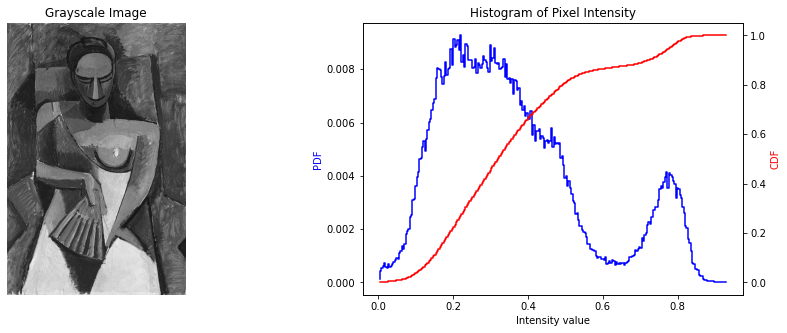

In [10]:
def pixel_intensity_hist(filepath, num):
    
    files = list(np.random.choice(filepath, num, replace=False))
      
    gray_image = []
        
    for i in files:
        image = plt.imread(i) 
        gray_image.append(rgb2gray(image))

    for img in gray_image:
        fig, ax = plt.subplots(1,2, figsize=(15,5))
        ax[0].imshow(img, cmap='gray')
        ax[0].set_title('Grayscale Image')
        ax[0].axis('off')
        ax1 = ax[1]
        ax2 = ax1.twinx()
        freq_h, bins_h = histogram(img)
        freq_c, bins_c = cumulative_distribution(img)
        ax1.step(bins_h, freq_h*1.0/freq_h.sum(), c='b', label='PDF')
        ax2.step(bins_c, freq_c, c='r',  label='CDF')
        ax1.set_ylabel('PDF', color='b')
        ax2.set_ylabel('CDF', color='r')
        ax[1].set_xlabel('Intensity value')
        ax[1].set_title('Histogram of Pixel Intensity')
    
    return gray_image

images = pixel_intensity_hist(filepath, 1)
plt.savefig(f'../data/pixel_intensity.jpg', bbox_inches='tight')